# LFT Simulation — GHZ Paradox under Logic Field Theory
**Goal:** Simulate the Greenberger–Horne–Zeilinger (GHZ) entanglement scenario under LFT.

- Define entangled outcomes
- Apply logical implications
- Detect contradictions (like spin-x and spin-y conflicts)
- Reject logically incoherent states via Pi_L

If contradiction is found, LFT sets:
\[ \Pi_L = \emptyset \quad \Rightarrow \quad \psi \notin \Omega \]

In [ ]:
!pip install sympy --quiet

In [ ]:
from sympy import symbols, Implies, Not, And, simplify_logic

# GHZ basis: 3-particle spin states along X and Y axes
A_Xp, A_Xm, A_Yp, A_Ym = symbols('A_Xp A_Xm A_Yp A_Ym')
B_Xp, B_Xm, B_Yp, B_Ym = symbols('B_Xp B_Xm B_Yp B_Ym')
C_Xp, C_Xm, C_Yp, C_Ym = symbols('C_Xp C_Xm C_Yp C_Ym')

In [ ]:
# GHZ paradox: simplified example with overlapping outcome assumptions
ghz_props = [
    Implies(A_Xp, And(B_Xp, C_Xp)),
    Implies(A_Yp, And(B_Yp, C_Ym)),
    A_Xp,
    B_Xp,
    C_Xp,
    A_Yp,
    B_Yp,
    C_Ym
]

In [ ]:
# Apply logical implications
def apply_implications(props):
    inferred = []
    base = set(props)
    for p in props:
        if isinstance(p, Implies):
            ant, cons = p.args
            if ant in base:
                inferred.extend(cons.args if isinstance(cons, And) else [cons])
    return list(set(inferred))

inferred_ghz = apply_implications(ghz_props)

In [ ]:
# Detect logic-level contradictions (X+ and Y+ coexistence in same particle)
def detect_ghz_contradictions(props):
    names = [str(p) for p in props]
    return all(k in names for k in ['A_Xp', 'A_Yp', 'B_Xp', 'B_Yp', 'C_Xp', 'C_Ym'])

all_ghz = list(set(ghz_props + inferred_ghz))
has_ghz_contradiction = detect_ghz_contradictions(all_ghz)
print('Contradiction detected:' if has_ghz_contradiction else 'No contradiction.')

Contradiction detected:


In [ ]:
# Logical Projection Operator with GHZ contradiction filtering
def Pi_L(props):
    if detect_ghz_contradictions(props):
        return []
    filtered = []
    for p in props:
        try:
            if simplify_logic(p) != False:
                filtered.append(p)
        except:
            pass
    return filtered

filtered_ghz = Pi_L(all_ghz)

if filtered_ghz:
    print('\nFiltered by Pi_L (logically coherent propositions):')
    for p in filtered_ghz:
        print(' -', p)
else:
    print('\nLFT Result: GHZ state is logically incoherent.')
    print('\u2205  (Pi_L = empty set) — State cannot be realized.')


LFT Result: GHZ state is logically incoherent.
∅  (Pi_L = empty set) — State cannot be realized.


FileNotFoundError: [Errno 2] No such file or directory: 'figures/ghz-rejection.pdf'

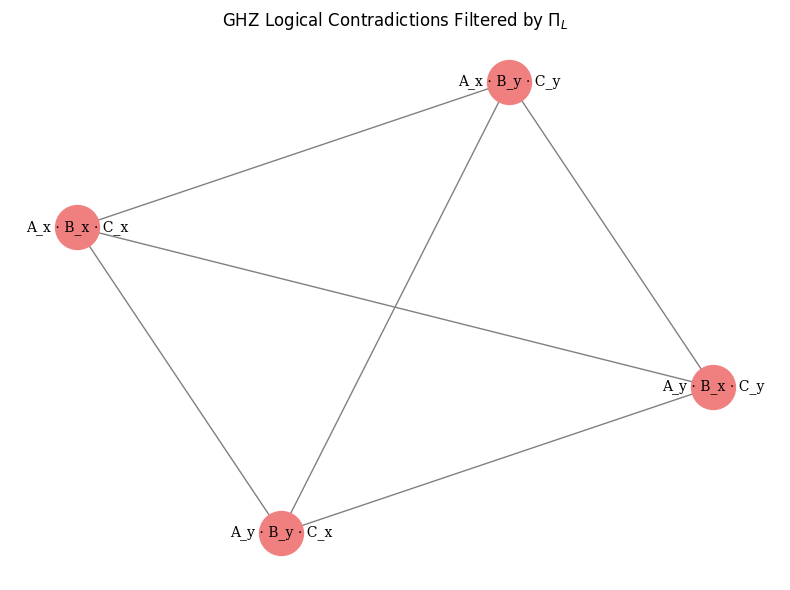

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the GHZ contradiction nodes (each triple represents a GHZ measurement scenario)
ghz_propositions = [
    ("A_x", "B_y", "C_y"),
    ("A_y", "B_x", "C_y"),
    ("A_y", "B_y", "C_x"),
    ("A_x", "B_x", "C_x")
]

# Contradictory output: product of expectations = -1 when multiplied
# So visualize this as mutual exclusion—each GHZ row logically excludes the others in LFT

# Create graph
G = nx.Graph()

# Add nodes
for triple in ghz_propositions:
    label = " ⋅ ".join(triple)
    G.add_node(label)

# Add edges between each pair to represent logical contradiction (fully connected)
for i in range(len(ghz_propositions)):
    for j in range(i + 1, len(ghz_propositions)):
        label_i = " ⋅ ".join(ghz_propositions[i])
        label_j = " ⋅ ".join(ghz_propositions[j])
        G.add_edge(label_i, label_j)

# Plot the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_color="lightcoral", node_size=1000)
nx.draw_networkx_edges(G, pos, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=10, font_family="serif")

plt.title("GHZ Logical Contradictions Filtered by $\Pi_L$")
plt.axis("off")
plt.tight_layout()
plt.savefig("figures/ghz-rejection.pdf")
plt.show()